In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/70-dog-breedsimage-data-set")

print("Path to dataset files:", path)
dog_df = pd.read_csv(path + '/dogs.csv')

100%|██████████| 215M/215M [00:02<00:00, 82.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/70-dog-breedsimage-data-set/versions/2


In [4]:
image_path = path + '/' + dog_df['filepaths'].iloc[0]

print(image_path)

/root/.cache/kagglehub/datasets/gpiosenka/70-dog-breedsimage-data-set/versions/2/train/Afghan/001.jpg


In [5]:
# get dataframes of dogs by train/test/validation

train_df = dog_df[dog_df.iloc[:, 2] == "train"].copy()
valid_df = dog_df[dog_df.iloc[:, 2] == "valid"].copy()
test_df = dog_df[dog_df.iloc[:, 2] == "test"].copy()
train_df.head()

,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


In [6]:
!pip install tensorflow.keras.layers
!pip install tensorflow.keras.optimizers
!pip install keras.models
!pip install keras.layers
!pip install keras.utils
!pip install keras.preprocessing.image

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.layers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.layers
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.optimizers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.optimizers
ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=07afb03e421a3282a84051cb7e5233b1df96e0adc1932072dbc0af43be107eb3
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found f

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout , Input , BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale, create directory paths
datagen = ImageDataGenerator(rescale=1./255,)

train_dir = path + '/train/'
test_dir = path + '/test/'
val_dir = path + '/valid/'

In [8]:
train_dataset = datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(224,224),
    class_mode='categorical'
)

# Load testing data
test_dataset = datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(224,224),
    class_mode='categorical'
)
val_dataset = datagen.flow_from_directory(
    val_dir,
    batch_size=64,
    target_size=(224,224),
    class_mode='categorical'
)
num_classes = 70

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [9]:
input_shape = (224, 224, 3)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(70, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset , batch_size=32 , verbose=1)
# stopped here as it took a while

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 287ms/step - accuracy: 0.0262 - loss: 6.3129 - val_accuracy: 0.0143 - val_loss: 4.2487
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.0788 - loss: 4.0450 - val_accuracy: 0.0186 - val_loss: 8.2336
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - accuracy: 0.1297 - loss: 3.7069 - val_accuracy: 0.0143 - val_loss: 8.5722
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.1835 - loss: 3.3787 - val_accuracy: 0.0543 - val_loss: 4.9793
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 158ms/step - accuracy: 0.2183 - loss: 3.1647 - val_accuracy: 0.1214 - val_loss: 3.8687
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 172ms/step - accuracy: 0.2750 - loss: 2.8883 - val_accuracy: 0.1586 - val_loss: 3.6010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - accuracy: 0.3157 - loss: 2.6220 - val_accuracy: 0.1643 - val_loss: 3.6413
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.3574 - loss: 2.4442 - val

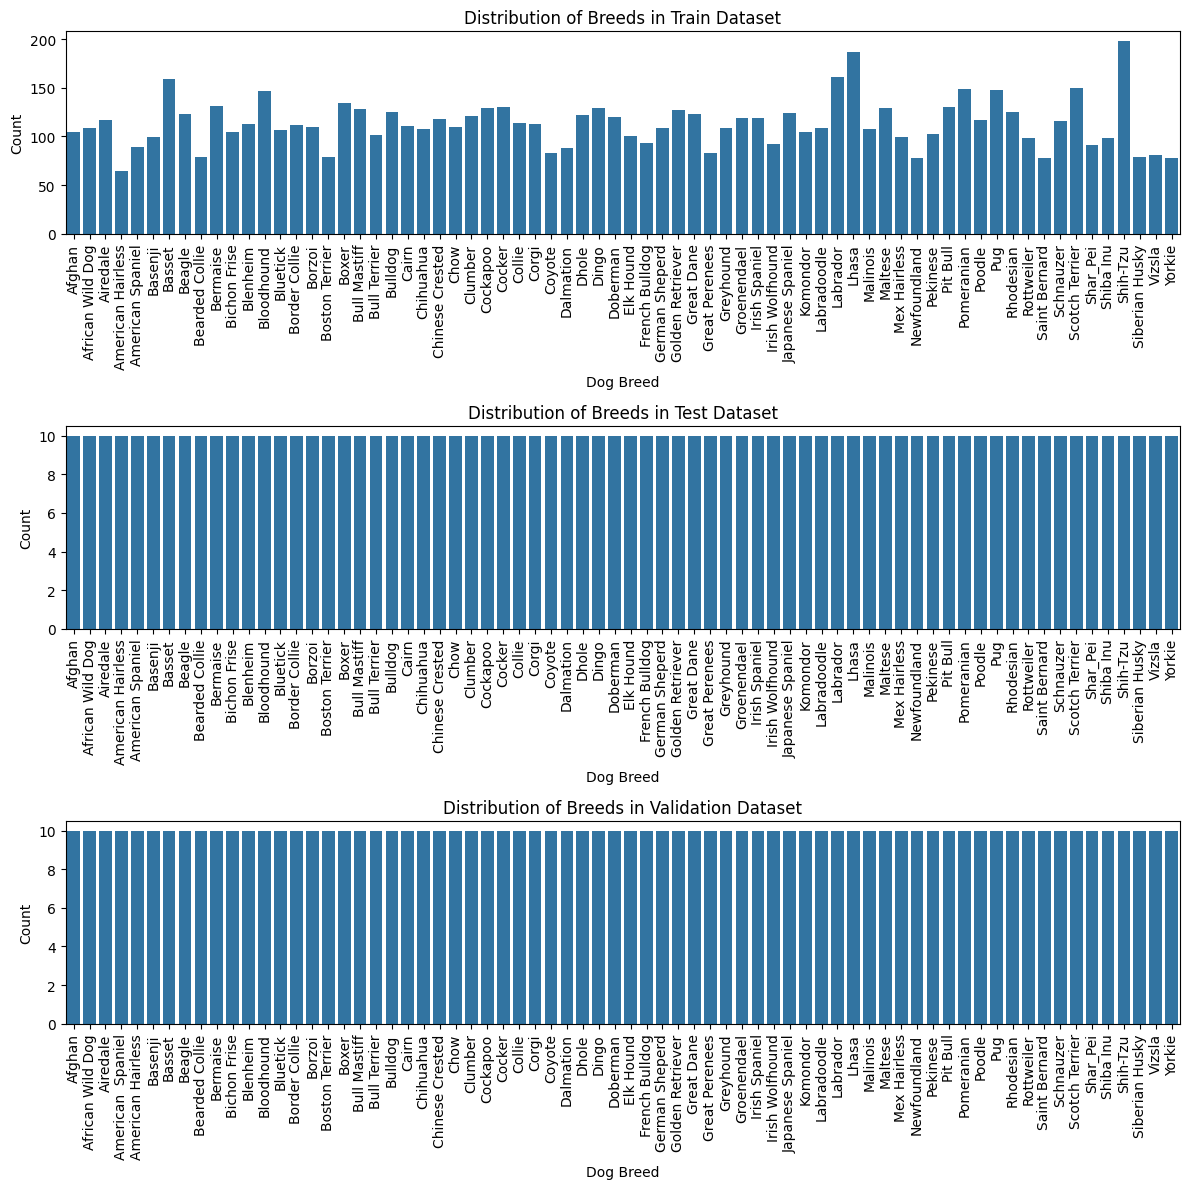

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots (one for each dataset)
fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # Adjust figsize as needed

# Plot histogram for the 'train' dataset
sns.countplot(x='labels', data=train_df, ax=axes[0])
axes[0].set_title('Distribution of Breeds in Train Dataset')
axes[0].set_xlabel('Dog Breed')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot histogram for the 'test' dataset
sns.countplot(x='labels', data=test_df, ax=axes[1])
axes[1].set_title('Distribution of Breeds in Test Dataset')
axes[1].set_xlabel('Dog Breed')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot histogram for the 'valid' dataset
sns.countplot(x='labels', data=valid_df, ax=axes[2])
axes[2].set_title('Distribution of Breeds in Validation Dataset')
axes[2].set_xlabel('Dog Breed')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## VGG Model

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define number of classes based on the dataset
num_classes = 70

# Load the VGG16 model pretrained on ImageNet, excluding the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to prevent it from being updated during initial training
for layer in base_model.layers:
    layer.trainable = False

# Build the new model with additional layers
vgg_model = Sequential([
    base_model,  # Using the pre-trained VGG16 as base
    Flatten(),  # Flatten the output of the convolutional base
    Dense(256, activation='relu'),  # Add a fully connected layer with 256 units
    Dropout(0.5),  # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Final layer with number of classes
])

# Compile the model using Adam optimizer and categorical cross-entropy loss
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model's architecture
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 70)                  │          17,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,155,462 (80.70 MB)

 Trainable params: 6,440,774 (24.57 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# since the train_dataset and val_dataset are already prepared

# Train the model
history = vgg_model.fit(
    train_dataset,
    epochs=150,
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 93s 518ms/step - accuracy: 0.0348 - loss: 4.2521 - val_accuracy: 0.1314 - val_loss: 3.7181
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 279ms/step - accuracy: 0.1225 - loss: 3.6652 - val_accuracy: 0.2671 - val_loss: 3.1262
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.2277 - loss: 3.1525 - val_accuracy: 0.4143 - val_loss: 2.6782
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 277ms/step - accuracy: 0.3192 - loss: 2.7643 - val_accuracy: 0.4571 - val_loss: 2.3543
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.3749 - loss: 2.4657 - val_accuracy: 0.5300 - val_loss: 2.1396
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 296ms/step - accuracy: 0.4443 - loss: 2.2006 - val_accuracy: 0.5900 - val_loss: 1.9155
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 277ms/step - accuracy: 0.5021 - loss: 1.9845 - val_accuracy: 0.5943 - val_loss: 1.8177
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 278ms/step - accuracy: 0.5404 - loss: 1.811

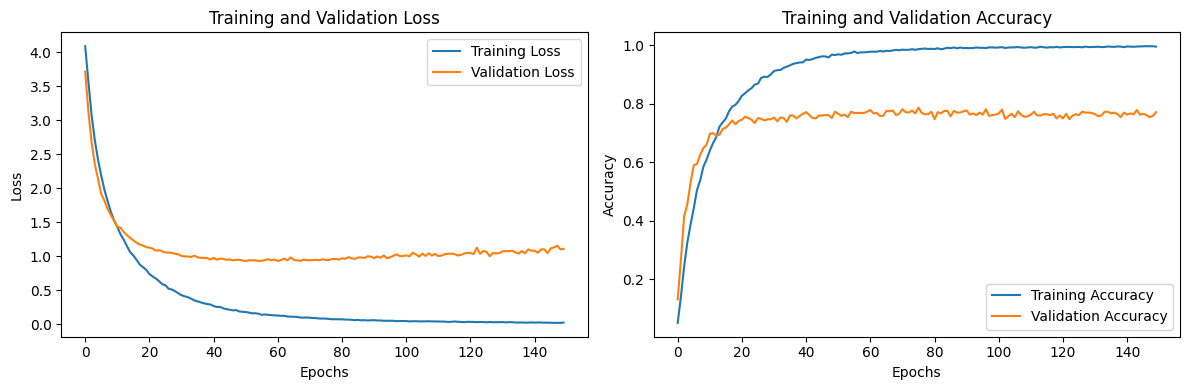

In [13]:
# Extract loss and accuracy for both training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Determine the number of epochs
epochs = range(len(train_loss))

# Plot Training and Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [14]:
# Save the vgg model
vgg_model.save('vgg_dog_breed_model.h5')

## TO continue Training, load vgg_model and continue, then save

In [15]:
from tensorflow.keras.models import load_model

# Load the entire model
vgg_model = load_model('vgg_dog_breed_model.h5')

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Load the model
vgg_model = load_model('vgg_dog_breed_model.h5')

# Create a new optimizer instance
new_optimizer = Adam(learning_rate=0.0001)

# Re-compile the model with the new optimizer
vgg_model.compile(optimizer=new_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Continue training the model
history = vgg_model.fit(
    train_dataset,
    epochs=150,  # Adjust as needed
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - accuracy: 0.9968 - loss: 0.0214 - val_accuracy: 0.7486 - val_loss: 1.1487
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - accuracy: 0.9946 - loss: 0.0252 - val_accuracy: 0.7514 - val_loss: 1.1702
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 275ms/step - accuracy: 0.9931 - loss: 0.0293 - val_accuracy: 0.7557 - val_loss: 1.1600
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 276ms/step - accuracy: 0.9943 - loss: 0.0312 - val_accuracy: 0.7600 - val_loss: 1.1762
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.9939 - loss: 0.0269 - val_accuracy: 0.7586 - val_loss: 1.1714
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 275ms/step - accuracy: 0.9953 - loss: 0.0258 - val_accuracy: 0.7629 - val_loss: 1.1450
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/step - accuracy: 0.9962 - loss: 0.0216 - val_accuracy: 0.7600 - val_loss: 1.1540
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 0.9978 -

### Evaluate the model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


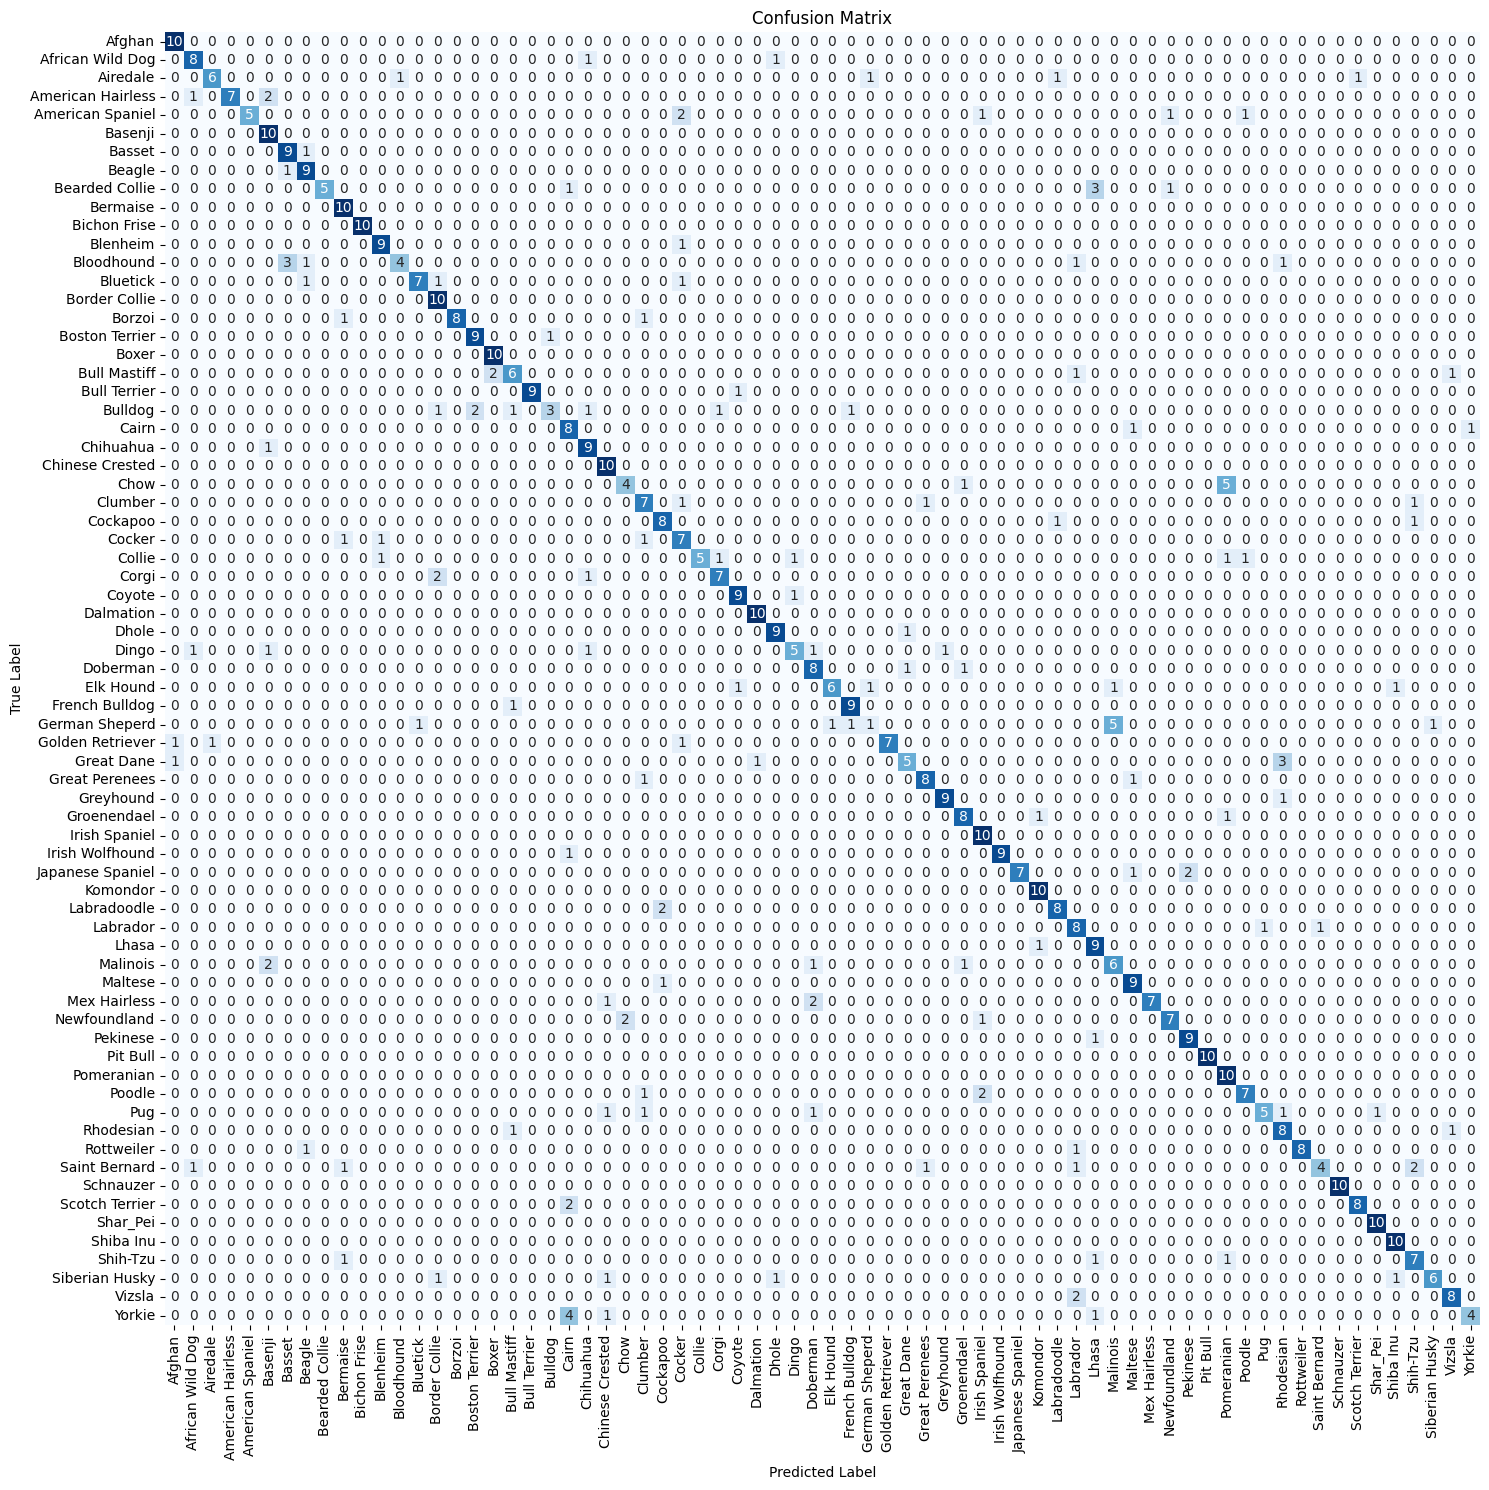

Classification Report:
                   precision    recall  f1-score   support

           Afghan       0.83      1.00      0.91        10
 African Wild Dog       0.73      0.80      0.76        10
         Airedale       0.86      0.60      0.71        10
American Hairless       1.00      0.70      0.82        10
 American Spaniel       1.00      0.50      0.67        10
          Basenji       0.62      1.00      0.77        10
           Basset       0.69      0.90      0.78        10
           Beagle       0.69      0.90      0.78        10
   Bearded Collie       1.00      0.50      0.67        10
         Bermaise       0.71      1.00      0.83        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.82      0.90      0.86        10
       Bloodhound       0.80      0.40      0.53        10
         Bluetick       0.88      0.70      0.78        10
    Border Collie       0.67      1.00      0.80        10
           Borzoi       1.00    

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the mapping of class indices to breed names
class_indices = train_dataset.class_indices
index_to_breed = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to map indices to breed names

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    conf_mat = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(15, 15))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Function to compute y_true and y_pred for the entire dataset
def compute_predictions(test_data, model):
    y_true = []
    y_pred = []

    for batch, labels in test_data:
        preds = model.predict(batch)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(np.argmax(labels, axis=1))
        if len(y_true) >= test_data.samples:
            break

    return y_true, y_pred

# Get predictions and true labels
y_true, y_pred = compute_predictions(test_dataset, vgg_model)

# Get the list of class names from the index to breed mapping
class_names = list(index_to_breed.values())

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))